In [43]:
from androguard.misc import AnalyzeAPK, Analysis
from androguard.core.analysis.analysis import StringAnalysis
import os
import pandas as pd
from dotenv import dotenv_values
import numpy as np

## Utility Functions

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor, log10
from collections import Counter

benford = pd.DataFrame(
    {
        'digit': [1, 2, 3, 4, 5, 6, 7, 8, 9],
        'freq': [.301, .176, .125, .097, .079, .067, .058, .051, .046]
    })

def get_first_digit(i: int):
    if i == 0:
        return 0
    return floor(i / (10 ** floor(log10(i))))

def score_distance(df1, df2):
    df = pd.merge(df1, df2, on='digit', suffixes=['1', '2'])
    df['distance'] = abs(df['freq1'] - df['freq2'])
    return round(df['distance'].mean(), 4)

def data_to_df(data: list[int]):
    # Take list of data points and return dataframe of first digit frequencies as percentages
    fd = [get_first_digit(d) for d in data]
    df = pd.DataFrame(Counter(fd).items(), columns=['digit', 'freq'])
    df = df[df['digit'] != 0]
    total = df['freq'].sum()
    df['freq'] = df['freq'].astype(float)
    df['freq'] /= total
    return df.copy()

def graph(data: list[int], title=""):
    df = data_to_df(data).copy()

    fig, ax = plt.subplots()
    
    sns.lineplot(x=df['digit'], y=df['freq'], ax=ax, markers='o', markersize=6, label='Custom').set(xlabel='First Digit', ylabel="Frequency", title=title)
    sns.lineplot(x=benford['digit'], y=benford['freq'], ax=ax, label='Benford')
    ax.text(.8, .8, "Score: " + str(score_distance(df, benford)), transform=ax.transAxes)


## Lengths of constant strings

In [36]:
def graph_string_length(analysis):
    strings = analysis.get_strings()  # dex[0].get_strings()
    strings = list(map(StringAnalysis.get_value, strings))
    strings = list(map(str.strip, strings))

    data = list(map(len, strings))

    graph(data, "String length")

## Sum of Decimal encoded characters of constant strings

In [35]:
def sum_of_chars(s):
    return sum(ord(c) for c in s)

def graph_string_value(analysis):
    strings = analysis.get_strings()  # dex[0].get_strings()
    strings = list(map(StringAnalysis.get_value, strings))

    strings = list(map(str.strip, strings))

    data = list(map(sum_of_chars, strings))

    graph(data, "String value")

## Lengths of methods

In [34]:
def graph_method_lengths(analysis):
    methods = analysis.get_methods()

    # The above get_methods() method returns a deprecated type, so we get_method() again below to return a usable type.
    # External methods don't have available lengths, so we skip past them
    method_lengths = [method.get_method().get_length() for method in methods if not method.is_external()]

    graph(method_lengths, "Method Lengths")

## Number of fields in a class

In [39]:
def graph_class_fields(analysis):
    classes = analysis.get_internal_classes()

    fields = [c.get_fields() for c in classes]

    fields_count = map(len, fields)

    graph(fields_count, "Class Fields")

## Number of methods in a class

In [41]:
def graph_class_methods(analysis):
    classes = analysis.get_internal_classes()

    methods = [c.get_methods() for c in classes]

    methods_count = map(len, methods)

    graph(methods_count, "Class Methods")

## Main Code

In [2]:
keys = dotenv_values('.ben')

API_KEY = keys['ANDROZOO_API_KEY']

### Unpack Android APKs

In [11]:
# https://apkcombo.com/colornote/com.socialnmobile.dictapps.notepad.color.note/download/apk
test_apk = os.path.abspath('./APKs/color_note.apk')

apk,dex,analysis = AnalyzeAPK(test_apk)

Requested API level 31 is larger than maximum we have, returning API level 29 instead.


### Create Graphs

[42, 26, 10, 7, 15, 18, 18, 18, 15, 16, 12, 36, 20, 15, 24, 28, 48, 40, 25, 10, 49, 51, 34, 13, 47, 7, 18, 29, 50, 5, 19, 21, 3, 24, 19, 17, 46, 53, 1, 28, 29, 31, 28, 29, 29, 31, 34, 27, 27, 28, 35, 33, 34, 35, 26, 30, 32, 36, 34, 29, 36, 39, 42, 35, 39, 31, 37, 32, 36, 38, 13, 7, 7, 45, 54, 29, 24, 33, 27, 36, 5, 1, 14, 8, 10, 15, 6, 11, 20, 8, 10, 10, 13, 16, 17, 17, 1, 46, 53, 62, 61, 37, 38, 36, 37, 14, 48, 61, 1, 35, 22, 15, 21, 0, 9, 1, 21, 84, 44, 55, 15, 13, 15, 4, 5, 21, 72, 27, 20, 6, 8, 8, 20, 9, 12, 11, 7, 7, 11, 8, 25, 15, 9, 8, 8, 185, 16, 14, 49, 54, 14, 49, 54, 53, 58, 39, 40, 16, 61, 66, 8, 41, 7, 39, 3, 15, 33, 156, 6, 48, 19, 18, 16, 8, 21, 41, 50, 42, 102, 81, 44, 41, 1, 173, 110, 6, 15, 17, 40, 19, 4, 18, 23, 34, 55, 36, 18, 29, 32, 29, 53, 3, 29, 26, 6, 18, 25, 67, 12, 11, 11, 39, 28, 9, 26, 11, 46, 24, 34, 28, 23, 16, 5, 4, 3, 6, 13, 45, 19, 14, 23, 19, 14, 16, 1, 1, 131, 128, 3, 1, 1, 10, 8, 8, 2, 22, 1, 16, 0, 13, 20, 19, 21, 67, 9, 1, 60, 52, 56, 14, 12, 26, 

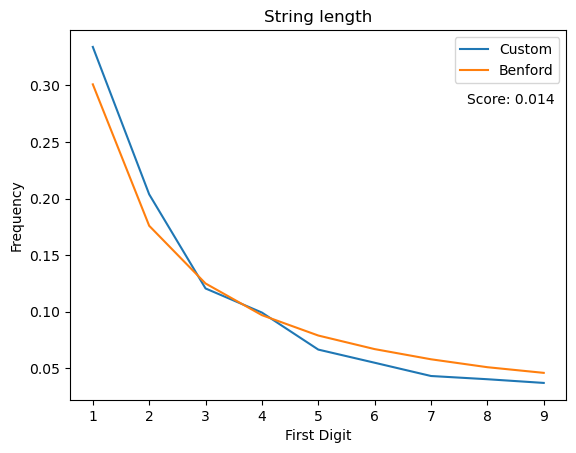

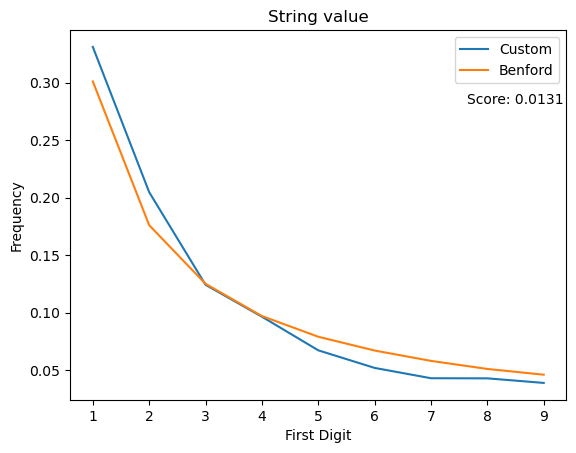

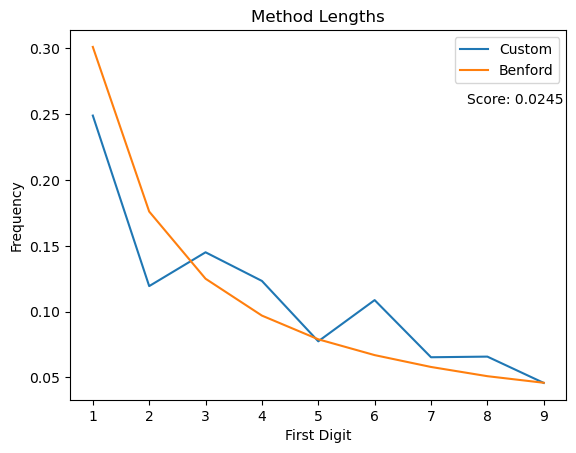

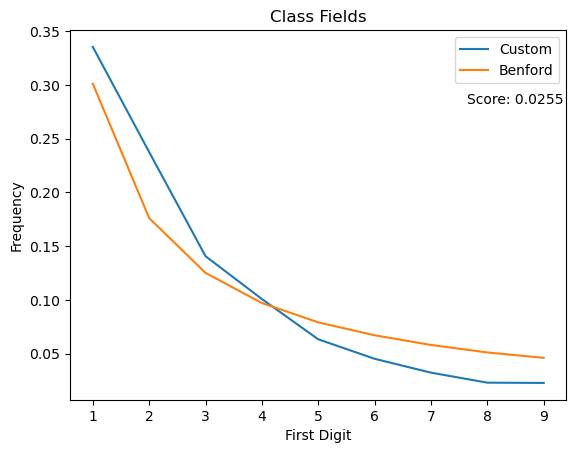

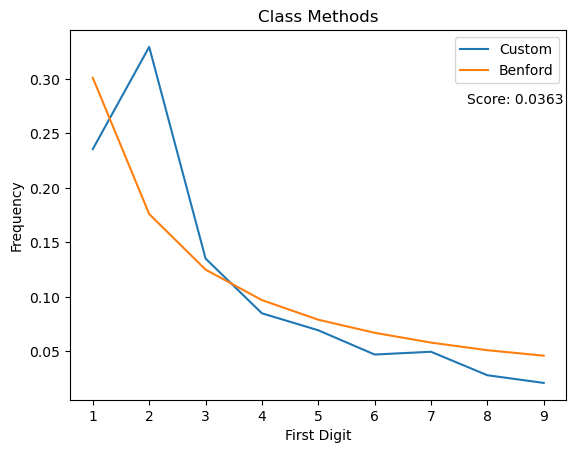

In [71]:
graph_string_length(analysis)
graph_string_value(analysis)
graph_method_lengths(analysis)
graph_class_fields(analysis)
graph_class_methods(analysis)